In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
df = pd.read_csv('./data/서울시 코로나19 확진자 현황.csv ', sep=',', encoding='euc-kr')
df.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,8966,11.30.,NaN,NaN,NaN,강북구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
1,8965,11.30.,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
2,8964,11.30.,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
3,8963,11.30.,NaN,NaN,NaN,영등포구,NaN,서초구 사우나 관련,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
4,8962,11.30.,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y


In [3]:
soco = df[['확진일','지역','여행력','접촉력','상태','이동경로']]
soco.tail()

,확진일,지역,여행력,접촉력,상태,이동경로
8961,1.31.,성북구,NaN,#5 접촉,퇴원,이동경로 공개기간 경과
8962,1.30.,마포구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과
8963,1.30.,종로구,NaN,#3 접촉,퇴원,이동경로 공개기간 경과
8964,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과
8965,1.24.,강서구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과


In [4]:
# nan값 공백으로 변경
soco = soco.fillna(' ')
soco.head()

,확진일,지역,여행력,접촉력,상태,이동경로
0,11.30.,강북구,,감염경로 조사중,,
1,11.30.,타시도,,기타 확진자 접촉,,
2,11.30.,타시도,,감염경로 조사중,,
3,11.30.,영등포구,,서초구 사우나 관련,,
4,11.30.,영등포구,,감염경로 조사중,,


In [5]:
soco['상태'] = soco['상태'].map(lambda s: s.replace(' ', '치료'))
soco

,확진일,지역,여행력,접촉력,상태,이동경로
0,11.30.,강북구,,감염경로 조사중,치료,
1,11.30.,타시도,,기타 확진자 접촉,치료,
2,11.30.,타시도,,감염경로 조사중,치료,
3,11.30.,영등포구,,서초구 사우나 관련,치료,
4,11.30.,영등포구,,감염경로 조사중,치료,
...,...,...,...,...,...,...
8961,1.31.,성북구,,#5 접촉,퇴원,이동경로 공개기간 경과
8962,1.30.,마포구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과
8963,1.30.,종로구,,#3 접촉,퇴원,이동경로 공개기간 경과
8964,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과


In [6]:
# soco.to_excel('./results/서울시코로나확진자.xlsx')

In [7]:
soco['확진일'] = pd.to_datetime(soco['확진일'].map(lambda s: '2020.'+ s))

In [8]:
soco.head()

,확진일,지역,여행력,접촉력,상태,이동경로
0,2020-11-30,강북구,,감염경로 조사중,치료,
1,2020-11-30,타시도,,기타 확진자 접촉,치료,
2,2020-11-30,타시도,,감염경로 조사중,치료,
3,2020-11-30,영등포구,,서초구 사우나 관련,치료,
4,2020-11-30,영등포구,,감염경로 조사중,치료,


In [9]:
soco['확진'] = 1
soco.head()

,확진일,지역,여행력,접촉력,상태,이동경로,확진
0,2020-11-30,강북구,,감염경로 조사중,치료,,1
1,2020-11-30,타시도,,기타 확진자 접촉,치료,,1
2,2020-11-30,타시도,,감염경로 조사중,치료,,1
3,2020-11-30,영등포구,,서초구 사우나 관련,치료,,1
4,2020-11-30,영등포구,,감염경로 조사중,치료,,1


In [10]:
soco_11 = soco[soco['확진일'].dt.strftime('%m') == '11']
soco_11

,확진일,지역,여행력,접촉력,상태,이동경로,확진
0,2020-11-30,강북구,,감염경로 조사중,치료,,1
1,2020-11-30,타시도,,기타 확진자 접촉,치료,,1
2,2020-11-30,타시도,,감염경로 조사중,치료,,1
3,2020-11-30,영등포구,,서초구 사우나 관련,치료,,1
4,2020-11-30,영등포구,,감염경로 조사중,치료,,1
...,...,...,...,...,...,...,...
2905,2020-11-01,도봉구,,동대문구 에이스희망케어센터 관련,퇴원,이동경로 공개기간 경과,1
2906,2020-11-01,마포구,,타시도 확진자 접촉,퇴원,이동경로 공개기간 경과,1
2907,2020-11-01,강남구,,서울음악 교습 관련,퇴원,이동경로 공개기간 경과,1
2908,2020-11-01,강남구,,기타 확진자 접촉,퇴원,이동경로 공개기간 경과,1


### 서울 코로나 확진자 수 데이터 피봇(pivot_table)

In [11]:
soco_pv = pd.pivot_table(soco, index=['지역'], columns=['확진일'], values=['확진'], aggfunc='count')
soco_pv = soco_pv.fillna(0)
soco_pv.head()

확진                                                         \
확진일 2020-01-24 2020-01-30 2020-01-31 2020-02-02 2020-02-05 2020-02-06   
지역                                                                      
강남구        0.0        0.0        0.0        0.0        0.0        0.0   
강동구        0.0        0.0        0.0        0.0        0.0        0.0   
강북구        0.0        0.0        0.0        0.0        0.0        0.0   
강서구        1.0        0.0        0.0        0.0        0.0        0.0   
경기도        0.0        0.0        0.0        0.0        0.0        0.0   

                                                 ...                        \
확진일 2020-02-07 2020-02-16 2020-02-19 2020-02-20  ... 2020-11-21 2020-11-22   
지역                                               ...                         
강남구        0.0        0.0        0.0        1.0  ...        9.0        5.0   
강동구        0.0        0.0        0.0        0.0  ...        6.0        4.0   
강북구        0.0        0.0        0.0        0.0  ...        2.0        1.0   
강서구        0.0        0.0        0.0        0.0  ...        2.0        4.0   
경기도        0.0        0.0        0.0        0.0  ...        0.0        0.0   

                                                                       \
확진일 2020-11-23 2020-11-24 2020-11-25 2020-11-26 2020-11-27 2020-11-28   
지역                                                                      
강남구       17.0       14.0       11.0        5.0        8.0        6.0   
강동구        5.0        4.0        5.0        2.0        3.0        5.0   
강북구        0.0        4.0        5.0        1.0        1.0        2.0   
강서구        6.0        9.0       58.0       56.0       23.0       15.0   
경기도        0.0        0.0        0.0        0.0        1.0        0.0   

                           
확진일 2020-11-29 2020-11-30  
지역                         
강남구       12.0       12.0  
강동구        2.0        5.0  
강북구        8.0        4.0  
강서구       15.0       15.0  
경기도        0.0        0.0  

[5 rows x 283 columns]

#### 데이터 프레임에서 문자열 타입을 변경
- 데이터 프레임에서 데이터 타입 바꾸는 방법
- 1. astype()을 사용(ex. DataFrame.astype(int또는 float)) : 모든 열의 데이터 타입을 변경
- 2. astype(ex. {'컬럼명': int 또는 float})  : 특정 컬럼이 데이터 타입을 변경
- 3. float 값을 반올림하여 int로 변경(ex. DataFrame.round(0).astype(int)) :  float 수를 0에 가깝게 반올림
- 4. Pandas에서float를int로 변환하는to_numeric()메소드(ex. pd.to_numeric(DataFrame, downcast='integer'))
: 이 방법은 숫자가 아닌 유형 (예 : 문자열)을 적합한 숫자 유형으로 안전하게 변환하는 기능을 제공

In [12]:
# 소수를 정수로 변경
soco_pv = soco_pv.astype('int')
soco_pv.head()

확진                                                         \
확진일 2020-01-24 2020-01-30 2020-01-31 2020-02-02 2020-02-05 2020-02-06   
지역                                                                      
강남구          0          0          0          0          0          0   
강동구          0          0          0          0          0          0   
강북구          0          0          0          0          0          0   
강서구          1          0          0          0          0          0   
경기도          0          0          0          0          0          0   

                                                 ...                        \
확진일 2020-02-07 2020-02-16 2020-02-19 2020-02-20  ... 2020-11-21 2020-11-22   
지역                                               ...                         
강남구          0          0          0          1  ...          9          5   
강동구          0          0          0          0  ...          6          4   
강북구          0          0          0          0  ...          2          1   
강서구          0          0          0          0  ...          2          4   
경기도          0          0          0          0  ...          0          0   

                                                                       \
확진일 2020-11-23 2020-11-24 2020-11-25 2020-11-26 2020-11-27 2020-11-28   
지역                                                                      
강남구         17         14         11          5          8          6   
강동구          5          4          5          2          3          5   
강북구          0          4          5          1          1          2   
강서구          6          9         58         56         23         15   
경기도          0          0          0          0          1          0   

                           
확진일 2020-11-29 2020-11-30  
지역                         
강남구         12         12  
강동구          2          5  
강북구          8          4  
강서구         15         15  
경기도          0          0  

[5 rows x 283 columns]

In [13]:
# soco_pv.to_excel('./results/서울시코로나확진자테이블.xlsx')

In [14]:
soco_pv1 = pd.pivot_table(soco, index=['확진일'], columns=['지역'], values=['확진'], aggfunc='count')
soco_pv1 = soco_pv1.fillna(0)
soco_pv1 = soco_pv1.astype('int')
soco_pv1.head()

확진                                     ...                       \
지역         강남구 강동구 강북구 강서구 경기도 관악구 광진구 구로구 금천구 기타  ... 성북구 송파구 양천구 영등포구 용산구   
확진일                                                ...                        
2020-01-24   0   0   0   1   0   0   0   0   0  0  ...   0   0   0    0   0   
2020-01-30   0   0   0   0   0   0   0   0   0  0  ...   0   0   0    0   0   
2020-01-31   0   0   0   0   0   0   0   0   0  0  ...   1   0   0    0   0   
2020-02-02   0   0   0   0   0   0   0   0   0  0  ...   0   0   0    0   0   
2020-02-05   0   0   0   0   0   0   0   0   0  0  ...   1   1   0    0   0   

                               
지역         은평구 종로구 중구 중랑구 타시도  
확진일                            
2020-01-24   0   0  0   0   0  
2020-01-30   0   1  0   1   0  
2020-01-31   0   2  0   0   0  
2020-02-02   0   0  0   0   1  
2020-02-05   0   0  0   0   0  

[5 rows x 28 columns]

### 서울 코로나 확진자 수 데이터 그룹화(groupby)

#### 지역별 확진자수

In [15]:
soco_gu = soco.groupby(['지역'])[['확진']].count()
soco_gu.head()

,확진
지역,
강남구,520
강동구,277
강북구,200
강서구,604
경기도,1


In [16]:
soco_gu00 = soco.groupby(['지역'])[['확진']].count()
soco_gu00.head()

,확진
지역,
강남구,520
강동구,277
강북구,200
강서구,604
경기도,1


In [17]:
# 지역 인덱스를 다시 컬럼으로 넣음
soco_gu00 = soco_gu00.reset_index()
soco_gu00

,지역,확진
0,강남구,520
1,강동구,277
2,강북구,200
3,강서구,604
4,경기도,1
5,관악구,547
6,광진구,186
7,구로구,277
8,금천구,125
9,기타,234


#### 확진일별 지역의 확진자수

In [18]:
soco_gu1 = soco.groupby(['지역','확진일'])[['확진']].count()
soco_gu1.head()

확진
지역  확진일           
강남구 2020-02-20   1
    2020-02-26   2
    2020-02-27   2
    2020-02-28   2
    2020-02-29   1

In [19]:
soco_gu1 = soco_gu1.reset_index()
soco_gu1

,지역,확진일,확진
0,강남구,2020-02-20,1
1,강남구,2020-02-26,2
2,강남구,2020-02-27,2
3,강남구,2020-02-28,2
4,강남구,2020-02-29,1
...,...,...,...
3136,타시도,2020-11-26,14
3137,타시도,2020-11-27,4
3138,타시도,2020-11-28,8
3139,타시도,2020-11-29,11


### 지역별 상태

In [20]:
soco_gu2 = soco.groupby(['지역','상태'])[['확진']].sum()
soco_gu2.head()

확진
지역  상태     
강남구 사망    4
    치료  126
    퇴원  390
강동구 사망    1
    치료   56

In [21]:
soco_gu2 = soco_gu2.reset_index()
soco_gu2.head()

,지역,상태,확진
0,강남구,사망,4
1,강남구,치료,126
2,강남구,퇴원,390
3,강동구,사망,1
4,강동구,치료,56


In [22]:
soco_gu2.head()

,지역,상태,확진
0,강남구,사망,4
1,강남구,치료,126
2,강남구,퇴원,390
3,강동구,사망,1
4,강동구,치료,56


In [23]:
soco_gu3 = soco_gu2.groupby(['상태'])[['확진']].mean()
soco_gu3.head()

,확진
상태,
사망,3.720000
치료,80.464286
퇴원,245.185185


### 11월 지역별 확진자수

In [24]:
soco_11_g = soco_11.groupby(['지역'])[['확진']].sum()
soco_11_g.head()

,확진
지역,
강남구,163
강동구,73
강북구,41
강서구,299
경기도,1


### 데이터 시각화

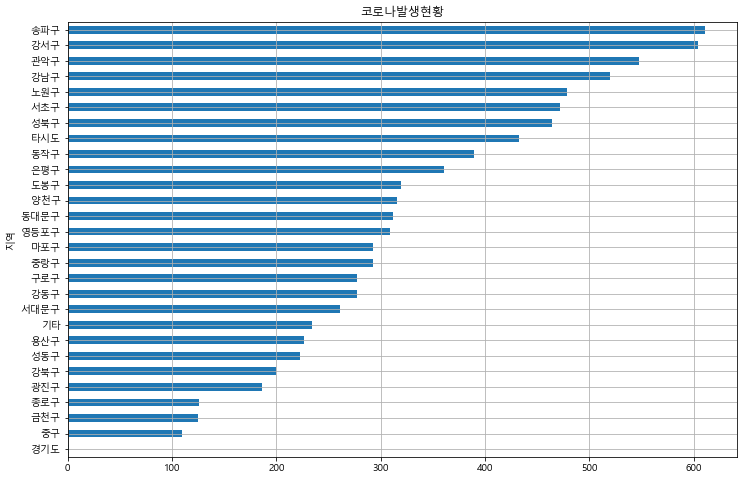

In [25]:
soco_gu['확진'].sort_values().plot(kind='barh', grid=True, figsize=(12,8), title='코로나발생현황')
plt.show()

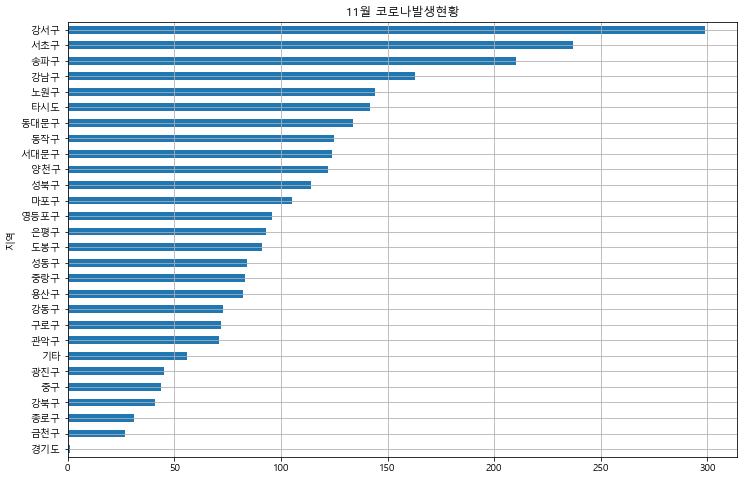

In [26]:
soco_11_g['확진'].sort_values().plot(kind='barh', grid=True, figsize=(12,8), title='11월 코로나발생현황')
plt.show()

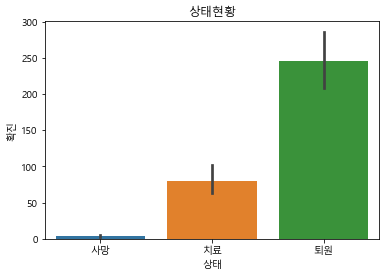

In [27]:
sns.barplot(x="상태", y="확진", data=soco_gu2)
plt.title("상태현황")
plt.show()

In [28]:
import folium
import json
import googlemaps

In [29]:
geo_path = './02. skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

In [30]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

folium.Choropleth(geo_data = geo_data,
               data = soco_gu['확진'],
               columns = [soco_gu.index, soco_gu['확진']],
               fill_color = 'PuRd',
               key_on = 'feature.id').add_to(map)
               
title_html = '<h3 align="center" style="font-size:20px"><b>서울시 코로나 현황</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map